In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [2]:
# Load the dataset
OpenFile = pd.read_csv("Almond.csv")
FirstTen = OpenFile.head(10)
FirstTen


,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA
5,5,NaN,231.914429,107.759789,19335.0,615.386863,NaN,0.957344,1.558628,NaN,NaN,0.727920,20196.5,MAMRA
6,6,NaN,226.371048,106.479408,18583.5,613.972649,NaN,0.956286,1.614212,NaN,NaN,0.727908,19433.0,MAMRA
7,7,NaN,226.186142,102.623077,18069.5,584.859952,NaN,0.968978,1.506426,NaN,NaN,0.740675,18648.0,MAMRA
8,8,413.477173,NaN,138.190536,41492.0,1078.984843,0.309009,0.950986,2.232834,NaN,NaN,0.767645,43630.5,MAMRA
9,9,418.210327,NaN,129.659897,40630.5,1039.428493,0.295783,0.955888,2.116056,NaN,NaN,0.758598,42505.5,MAMRA


In [3]:
# Get Overview of our data

In [4]:
Details = OpenFile.info()
Details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

In [5]:
# A 1.2
Data_Overview = {
    'Shape': OpenFile.shape,
    'Data Types': OpenFile.dtypes,
    'Missing Values': OpenFile.isnull().sum(),
    'Summary Statistics': OpenFile.describe()
}

# Shape
print("Shape:")
print(Data_Overview['Shape'])
print()

# Data Types
print("Data Types: ")
print(Data_Overview['Data Types'])
print()

# Display Missing Values
print("Missing Values: ")
print(Data_Overview['Missing Values'])
print()

# Summary Statistics
print("Summary Statistics: ")
print(Data_Overview['Summary Statistics'])
print()

Shape:
(2803, 14)

Data Types: 
Unnamed: 0                    int64
Length (major axis)         float64
Width (minor axis)          float64
Thickness (depth)           float64
Area                        float64
Perimeter                   float64
Roundness                   float64
Solidity                    float64
Compactness                 float64
Aspect Ratio                float64
Eccentricity                float64
Extent                      float64
Convex hull(convex area)    float64
Type                         object
dtype: object

Missing Values: 
Unnamed: 0                     0
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Typ

In [6]:
# Columns with Nan
numeric_cols = ["Length (major axis)", "Width (minor axis)", "Thickness (depth)", "Roundness", "Aspect Ratio", "Eccentricity"]

In [7]:
# Mean Imputation

In [8]:
# Mean Imputation for numeric columns and mode imputation for categorical columns
Mean_imputation = OpenFile.copy()
Mean_imputation[numeric_cols] = Mean_imputation[numeric_cols].fillna(Mean_imputation[numeric_cols].mean())
Mean_imputation['Type'].fillna(Mean_imputation['Type'].mode()[0], inplace=True)

# Drop unnecessary columns
Mean_imputation.drop(columns=['Unnamed: 0'], inplace=True)
Clean_data = Mean_imputation
Clean_data

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,290.609274,227.940628,127.759132,22619.0,643.813269,0.470466,0.973384,1.458265,1.753216,0.813114,0.681193,23237.5,MAMRA
1,290.609274,234.188126,128.199509,23038.0,680.984841,0.470466,0.957304,1.601844,1.753216,0.813114,0.656353,24065.5,MAMRA
2,290.609274,229.418610,125.796547,22386.5,646.943212,0.470466,0.967270,1.487772,1.753216,0.813114,0.683620,23144.0,MAMRA
3,290.609274,232.763153,125.918808,22578.5,661.227483,0.470466,0.965512,1.540979,1.753216,0.813114,0.685360,23385.0,MAMRA
4,290.609274,230.150742,107.253448,19068.0,624.842706,0.470466,0.951450,1.629395,1.753216,0.813114,0.714800,20041.0,MAMRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,290.609274,192.709366,122.356506,18471.5,653.345233,0.470466,0.931000,1.838965,1.753216,0.813114,0.725739,19840.5,SANORA
2799,290.609274,186.254745,118.708961,17213.5,581.688379,0.470466,0.952706,1.564234,1.753216,0.813114,0.714016,18068.0,SANORA
2800,290.609274,186.196182,119.147224,17510.5,608.315795,0.470466,0.948821,1.681705,1.753216,0.813114,0.718999,18455.0,SANORA
2801,290.609274,188.660828,120.634438,17941.0,630.759446,0.470466,0.944810,1.764701,1.753216,0.813114,0.738191,18989.0,SANORA


In [9]:
# A 1.2
Data_Overview_mean = {
    'Shape': Clean_data.shape,
    'Data Types': Clean_data.dtypes,
    'Missing Values': Clean_data.isnull().sum(),
    'Summary Statistics': Clean_data.describe()
}

# Shape
print("Shape:")
print(Data_Overview_mean['Shape'])
print()

# Data Types
print("Data Types: ")
print(Data_Overview_mean['Data Types'])
print()

# Display Missing Values
print("Missing Values: ")
print(Data_Overview_mean['Missing Values'])
print()

# Summary Statistics
print("Summary Statistics: ")
print(Data_Overview_mean['Summary Statistics'])
print()

Shape:
(2803, 13)

Data Types: 
Length (major axis)         float64
Width (minor axis)          float64
Thickness (depth)           float64
Area                        float64
Perimeter                   float64
Roundness                   float64
Solidity                    float64
Compactness                 float64
Aspect Ratio                float64
Eccentricity                float64
Extent                      float64
Convex hull(convex area)    float64
Type                         object
dtype: object

Missing Values: 
Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64

Summary Statistics: 
       Length (major axis)  Width (minor ax

In [10]:
# Label Encoding to the 'Type' column
label_encoder = LabelEncoder()
Clean_data['Type'] = label_encoder.fit_transform(Clean_data['Type'])
Clean_data

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,290.609274,227.940628,127.759132,22619.0,643.813269,0.470466,0.973384,1.458265,1.753216,0.813114,0.681193,23237.5,0
1,290.609274,234.188126,128.199509,23038.0,680.984841,0.470466,0.957304,1.601844,1.753216,0.813114,0.656353,24065.5,0
2,290.609274,229.418610,125.796547,22386.5,646.943212,0.470466,0.967270,1.487772,1.753216,0.813114,0.683620,23144.0,0
3,290.609274,232.763153,125.918808,22578.5,661.227483,0.470466,0.965512,1.540979,1.753216,0.813114,0.685360,23385.0,0
4,290.609274,230.150742,107.253448,19068.0,624.842706,0.470466,0.951450,1.629395,1.753216,0.813114,0.714800,20041.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,290.609274,192.709366,122.356506,18471.5,653.345233,0.470466,0.931000,1.838965,1.753216,0.813114,0.725739,19840.5,2
2799,290.609274,186.254745,118.708961,17213.5,581.688379,0.470466,0.952706,1.564234,1.753216,0.813114,0.714016,18068.0,2
2800,290.609274,186.196182,119.147224,17510.5,608.315795,0.470466,0.948821,1.681705,1.753216,0.813114,0.718999,18455.0,2
2801,290.609274,188.660828,120.634438,17941.0,630.759446,0.470466,0.944810,1.764701,1.753216,0.813114,0.738191,18989.0,2


In [11]:
# Separate features and labels
X = Clean_data.iloc[:, :-1].values
Y = Clean_data.iloc[:, -1].values

In [12]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Neural Network Architecture

In [14]:
# create a Keras model
def create_model(optimizer='adam', learning_rate=0.001):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(3, activation='sigmoid'))  # Binary classification
    
    # Compile model
    optimizer = tf.keras.optimizers.get(optimizer)
    optimizer.learning_rate = learning_rate
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = create_model()
model.summary()

C:\Users\o3006\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,011 (11.76 KB)

 Trainable params: 3,011 (11.76 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Wrap the Keras model for GridSearchCV
model = KerasClassifier(model=create_model, epochs=20, batch_size=32, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__learning_rate': [0.001, 0.01, 0.1]
}

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(X_train, Y_train)

# Display the best hyperparameters and score
print(f"Best Score: {grid_result.best_score_}")
print(f"Best Hyperparameters: {grid_result.best_params_}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\o3006\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\o3006\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\o3006\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Best Score: 0.7386259237782978
Best Hyperparameters: {'model__learning_rate': 0.01, 'model__optimizer': 'adam'}


In [16]:
# Function to collect weight updates across multiple runs
def collect_weight_updates(model, X_train, Y_train, epochs=20):
    weight_updates = []
    for epoch in range(epochs):
        model.fit(X_train, Y_train, epochs=1, verbose=0)
        weight_updates.append(model.get_weights())
    return weight_updates

# Train Adam and RMSprop models and collect weight updates
adam_model = create_model(optimizer='adam', learning_rate=grid_result.best_params_['model__learning_rate'])
rmsprop_model = create_model(optimizer='rmsprop', learning_rate=grid_result.best_params_['model__learning_rate'])

adam_updates = collect_weight_updates(adam_model, X_train, Y_train)
rmsprop_updates = collect_weight_updates(rmsprop_model, X_train, Y_train)

# Compute correlations between Adam and RMSprop updates for each layer
correlations = []
for epoch in range(len(adam_updates)):
    epoch_corr = []
    for adam_layer, rmsprop_layer in zip(adam_updates[epoch], rmsprop_updates[epoch]):
        adam_layer_flat = adam_layer.flatten()
        rmsprop_layer_flat = rmsprop_layer.flatten()
        corr = np.corrcoef(adam_layer_flat, rmsprop_layer_flat)[0, 1]  # Correlation coefficient
        epoch_corr.append(corr)
    correlations.append(epoch_corr)

# Display the correlations for each epoch
for epoch, corr in enumerate(correlations):
    print(f"Epoch {epoch + 1} Correlation Coefficients: {corr}")


C:\Users\o3006\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1 Correlation Coefficients: [-0.008771075300065627, -0.158979443772255, 0.014910672593080283, 0.20007020773814474, -0.0002447267926182651, 0.9086213365772663]
Epoch 2 Correlation Coefficients: [0.006541915694115775, -0.18511025396683625, 0.017460641496311616, 0.23936054229724746, -0.0004246346423476774, 0.7249302706848934]
Epoch 3 Correlation Coefficients: [0.009902067002298266, -0.12623985975218147, 0.017637704316024315, 0.24088966057103262, -0.03287355640612022, 0.9163244734185385]
Epoch 4 Correlation Coefficients: [0.013802083028839816, -0.1301898473520246, 0.026568018758539015, 0.22686520937957966, -0.04824970424209084, 0.8675163480581445]
Epoch 5 Correlation Coefficients: [0.010821071601310128, -0.09996696918993836, 0.02398281238003182, 0.24493431853407388, -0.05636592645464019, 0.9656982125354576]
Epoch 6 Correlation Coefficients: [0.006725786083706458, -0.06207795447833219, 0.028058533202725663, 0.23599486271172046, -0.04762741742267203, 0.900411351710003]
Epoch 7 Correlat

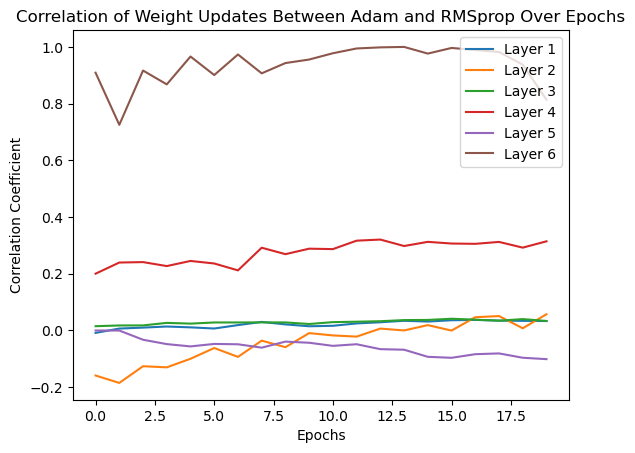

In [17]:
# Plot the correlation of weight updates over epochs for each layer
for layer_idx in range(len(correlations[0])):
    layer_correlations = [epoch_corr[layer_idx] for epoch_corr in correlations]
    plt.plot(layer_correlations, label=f'Layer {layer_idx + 1}')

plt.title('Correlation of Weight Updates Between Adam and RMSprop Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.show()

In [18]:

# Train with Adam optimizer
adam_model = create_model(optimizer='adam', learning_rate=grid_result.best_params_['model__learning_rate'])
history_adam = adam_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32)

# Train with RMSprop optimizer
rmsprop_model = create_model(optimizer='rmsprop', learning_rate=grid_result.best_params_['model__learning_rate'])
history_rmsprop = rmsprop_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32)

# Compare final accuracies
adam_accuracy = adam_model.evaluate(X_test, Y_test, verbose=0)[1]
rmsprop_accuracy = rmsprop_model.evaluate(X_test, Y_test, verbose=0)[1]

print(f"Adam Model Final Accuracy: {adam_accuracy:.4f}")
print(f"RMSprop Model Final Accuracy: {rmsprop_accuracy:.4f}")


Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5648 - loss: 0.8978 - val_accuracy: 0.6061 - val_loss: 0.8117
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - loss: 0.7269 - val_accuracy: 0.6756 - val_loss: 0.6860
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6946 - loss: 0.6689 - val_accuracy: 0.6863 - val_loss: 0.6758
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 0.6465 - val_accuracy: 0.6702 - val_loss: 0.6550
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7275 - loss: 0.6205 - val_accuracy: 0.6934 - val_loss: 0.6506
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.6220 - val_accuracy: 0.6774 - val_loss: 0.7085
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7224 - loss: 0.6065 - val_accuracy: 0.6791 - val_loss: 0.6591
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: 0.6003 - val_accuracy: 0.6809 - val_loss:

In [19]:
# Print epoch-wise accuracies for Adam
print("\nAdam Model Epoch-wise Accuracies:")
for epoch, acc in enumerate(history_adam.history['accuracy'], 1):
    print(f"Epoch {epoch}: {acc:.4f}")

# Print epoch-wise accuracies for RMSprop
print("\nRMSprop Model Epoch-wise Accuracies:")
for epoch, acc in enumerate(history_rmsprop.history['accuracy'], 1):
    print(f"Epoch {epoch}: {acc:.4f}")

# Print validation accuracies for both models
print("\nAdam Model Validation Accuracies:")
for epoch, val_acc in enumerate(history_adam.history['val_accuracy'], 1):
    print(f"Epoch {epoch}: {val_acc:.4f}")

print("\nRMSprop Model Validation Accuracies:")
for epoch, val_acc in enumerate(history_rmsprop.history['val_accuracy'], 1):
    print(f"Epoch {epoch}: {val_acc:.4f}")


Adam Model Epoch-wise Accuracies:
Epoch 1: 0.6182
Epoch 2: 0.6833
Epoch 3: 0.6945
Epoch 4: 0.6971
Epoch 5: 0.7217
Epoch 6: 0.7190
Epoch 7: 0.7141
Epoch 8: 0.7360
Epoch 9: 0.7333
Epoch 10: 0.7333
Epoch 11: 0.7409
Epoch 12: 0.7489
Epoch 13: 0.7618
Epoch 14: 0.7640
Epoch 15: 0.7640
Epoch 16: 0.7596
Epoch 17: 0.7792
Epoch 18: 0.7667
Epoch 19: 0.7828
Epoch 20: 0.7859

RMSprop Model Epoch-wise Accuracies:
Epoch 1: 0.6293
Epoch 2: 0.7012
Epoch 3: 0.7105
Epoch 4: 0.7177
Epoch 5: 0.7333
Epoch 6: 0.7400
Epoch 7: 0.7583
Epoch 8: 0.7516
Epoch 9: 0.7556
Epoch 10: 0.7591
Epoch 11: 0.7596
Epoch 12: 0.7627
Epoch 13: 0.7855
Epoch 14: 0.7868
Epoch 15: 0.7837
Epoch 16: 0.7962
Epoch 17: 0.7984
Epoch 18: 0.8029
Epoch 19: 0.7979
Epoch 20: 0.7997

Adam Model Validation Accuracies:
Epoch 1: 0.6061
Epoch 2: 0.6756
Epoch 3: 0.6863
Epoch 4: 0.6702
Epoch 5: 0.6934
Epoch 6: 0.6774
Epoch 7: 0.6791
Epoch 8: 0.6809
Epoch 9: 0.7237
Epoch 10: 0.7077
Epoch 11: 0.7326
Epoch 12: 0.7201
Epoch 13: 0.7344
Epoch 14: 0.7522
E

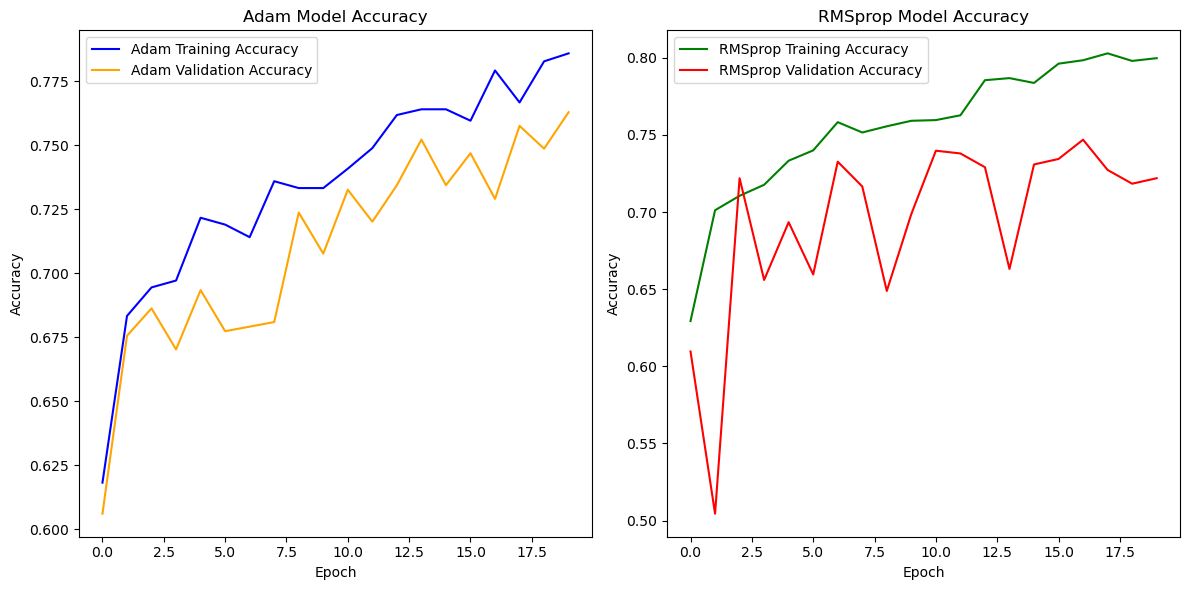

In [20]:
# Plot training and validation accuracies for Adam and RMSprop
plt.figure(figsize=(12, 6))

# Adam Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Adam Training Accuracy', color='blue')
plt.plot(history_adam.history['val_accuracy'], label='Adam Validation Accuracy', color='orange')
plt.title('Adam Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# RMSprop Model Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop Training Accuracy', color='green')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop Validation Accuracy', color='red')
plt.title('RMSprop Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Average the weights
adam_weights = adam_model.get_weights()
rmsprop_weights = rmsprop_model.get_weights()
hybrid_weights = [(adam_w + rmsprop_w) / 2 for adam_w, rmsprop_w in zip(adam_weights, rmsprop_weights)]

# Create hybrid model and set averaged weights
hybrid_model = create_model(optimizer='adam', learning_rate=grid_result.best_params_['model__learning_rate'])
hybrid_model.set_weights(hybrid_weights)

# Evaluate the hybrid model
hybrid_model_accuracy = hybrid_model.evaluate(X_test, Y_test)
print(f"Hybrid Model Accuracy: {hybrid_model_accuracy[1]}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6283 - loss: 0.8128  
Hybrid Model Accuracy: 0.6167557835578918


In [22]:


# Ensure weight updates are numpy arrays and then flatten them
final_epoch_adam_updates = [np.array(layer).flatten() for layer in adam_updates[-1]]
final_epoch_rmsprop_updates = [np.array(layer).flatten() for layer in rmsprop_updates[-1]]

# Perform T-test for each layer to see if weight updates are significantly different
for layer_idx, (adam_layer, rmsprop_layer) in enumerate(zip(final_epoch_adam_updates, final_epoch_rmsprop_updates)):
    t_stat, p_value = ttest_ind(adam_layer, rmsprop_layer)
    print(f"Layer {layer_idx + 1} - T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    
    # Check for significance
    if p_value < 0.05:
        print("The weight updates between Adam and RMSprop for this layer are significantly different.")
    else:
        print("The weight updates between Adam and RMSprop for this layer are not significantly different.")


Layer 1 - T-statistic: -0.8948, P-value: 0.3711
The weight updates between Adam and RMSprop for this layer are not significantly different.
Layer 2 - T-statistic: -1.4432, P-value: 0.1515
The weight updates between Adam and RMSprop for this layer are not significantly different.
Layer 3 - T-statistic: -3.1111, P-value: 0.0019
The weight updates between Adam and RMSprop for this layer are significantly different.
Layer 4 - T-statistic: 0.8907, P-value: 0.3765
The weight updates between Adam and RMSprop for this layer are not significantly different.
Layer 5 - T-statistic: 1.7846, P-value: 0.0759
The weight updates between Adam and RMSprop for this layer are not significantly different.
Layer 6 - T-statistic: 0.0025, P-value: 0.9981
The weight updates between Adam and RMSprop for this layer are not significantly different.
